In [1]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_blobs
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
%matplotlib inline

In [5]:
df = pd.read_csv('copyfinaldata.csv')
df = df.drop(columns = "Unnamed: 0")
df = df.drop(['PIN','Grade','Year','Major'], axis=1)
df

,Sex.x,Region,HSG,IndGrd2,Academic.Interest.1,Academic.Interest.2,SAT
0,M,Southeast Asia,NaN,91.575000,"Philosophy, Politics and Economics",NaN,770.0
1,M,Singapore,NaN,NaN,Life Sciences,NaN,NaN
2,M,Singapore,NaN,78.237500,Global Affairs,Psychology,NaN
3,F,Singapore,NaN,80.762500,Undecided,Philosophy,730.0
4,F,Singapore,NaN,79.225000,"Philosophy, Politics and Economics",Psychology,NaN
...,...,...,...,...,...,...,...
1007,F,South Asia,A,82.116166,Undecided,Physical Sciences,760.0
1008,F,Europe,B,75.794952,"Philosophy, Politics and Economics",Economics,640.0
1009,F,Singapore,B,67.149663,Global Affairs,Psychology,790.0
1010,F,Singapore,B,77.596502,"Philosophy, Politics and Economics",Economics,710.0


In [6]:
df = df.dropna()
df

,Sex.x,Region,HSG,IndGrd2,Academic.Interest.1,Academic.Interest.2,SAT
163,F,East Asia,A,91.865000,Life Sciences,Psychology,800.0
378,F,North America,A,69.425479,Economics,Arts & Humanities,730.0
384,M,East Asia,A,91.781178,"Mathematical, Computational and Statistical Sc...",Physical Sciences,800.0
388,F,North America,A,75.468598,Global Affairs,Anthropology,660.0
396,M,East Asia,B,93.940703,"Mathematical, Computational and Statistical Sc...",Economics,800.0
...,...,...,...,...,...,...,...
1005,M,East Asia,A,70.551997,Global Affairs,"Philosophy, Politics and Economics",790.0
1007,F,South Asia,A,82.116166,Undecided,Physical Sciences,760.0
1008,F,Europe,B,75.794952,"Philosophy, Politics and Economics",Economics,640.0
1009,F,Singapore,B,67.149663,Global Affairs,Psychology,790.0


In [7]:
df = df.replace(to_replace = ['A','B','C','D'],value = [4,3,2,1]) #converted HSG into numbers.
df.rename(columns={'Sex.x': 'Sex', 'Academic.Interest.1': 'AC1','Academic.Interest.2': 'AC2'}, inplace=True)

In [8]:
df.isna().sum()

Sex        0
Region     0
HSG        0
IndGrd2    0
AC1        0
AC2        0
SAT        0
dtype: int64

In [10]:
df['IndGrd'] = np.where((df.IndGrd2 < 86.3),0,df.IndGrd2)
df['IndGrd'].values[df['IndGrd'] > 0] = 1 #Replaced values smaller than 86.3 with 0, else 1 
df = df.drop(['IndGrd2'], axis=1)
df

,Sex,Region,HSG,AC1,AC2,SAT,IndGrd
163,F,East Asia,4,Life Sciences,Psychology,800.0,1.0
378,F,North America,4,Economics,Arts & Humanities,730.0,0.0
384,M,East Asia,4,"Mathematical, Computational and Statistical Sc...",Physical Sciences,800.0,1.0
388,F,North America,4,Global Affairs,Anthropology,660.0,0.0
396,M,East Asia,3,"Mathematical, Computational and Statistical Sc...",Economics,800.0,1.0
...,...,...,...,...,...,...,...
1005,M,East Asia,4,Global Affairs,"Philosophy, Politics and Economics",790.0,0.0
1007,F,South Asia,4,Undecided,Physical Sciences,760.0,0.0
1008,F,Europe,3,"Philosophy, Politics and Economics",Economics,640.0,0.0
1009,F,Singapore,3,Global Affairs,Psychology,790.0,0.0


In [12]:
df = pd.get_dummies(df, columns=['Sex','Region','AC1','AC2'])
df

,HSG,SAT,IndGrd,Sex_F,Sex_M,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,...,AC2_Global Affairs,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Urban Studies
163,4,800.0,1.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
378,4,730.0,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
384,4,800.0,1.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
388,4,660.0,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,3,800.0,1.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,4,790.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1007,4,760.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1008,3,640.0,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,3,790.0,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['IndGrd','PIN','Grade'], axis=1)
X = X1.values
y = df['IndGrd'].values #IndGrd is our predictor

In [38]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y)
model.predict_proba(X)
model.score(X, y)

0.9702970297029703

In [40]:
confusion_matrix(y, model.predict(X))

array([[86,  0],
       [ 3, 12]])

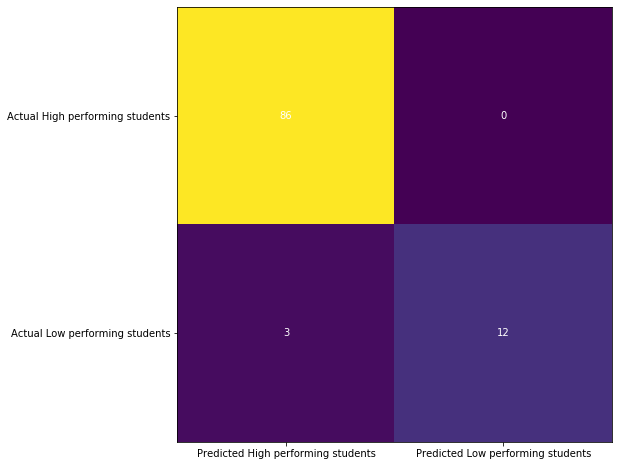

In [45]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted High performing students', 'Predicted Low performing students'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual High performing students', 'Actual Low performing students'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [31]:
 print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

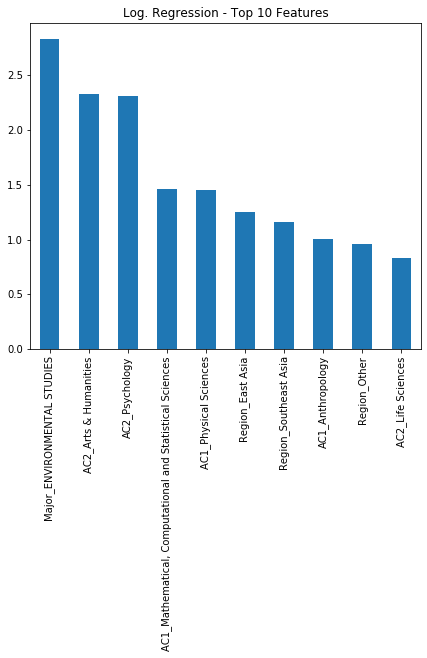

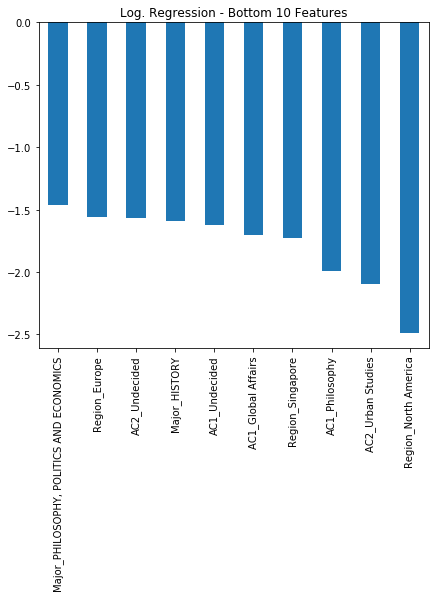

In [34]:
# Plot model evaluations.
feature_weights(X1, model, 'Log. Regression')

In [47]:
from sklearn.ensemble import RandomForestClassifier
# Instanciate and train the random forest model based on the training set.
rf = RandomForestClassifier()
rf.fit(X, y)
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X)
y_pred_rf_prob = rf.predict_proba(X)
# Plot model evaluations.
confusion_matrix(y, y_pred_rf)

array([[86,  0],
       [ 0, 15]])

In [60]:
rf.score(X, y) 

1.0